In [32]:
import pandas as pd
import warnings 
warnings.filterwarnings('ignore')
import numpy as np
col_names = ['UserID','MovieID','Rating','TimeStamp']
df = pd.read_csv('Recommend.csv',names = col_names)

In [33]:
df.head()

,UserID,MovieID,Rating,TimeStamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [59]:

df1 = pd.read_csv('movies.csv')
df1.columns = ['MovieID','Title','Genres']

In [60]:
df1.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [63]:
df2 = pd.merge(df,df1,on = 'MovieID')
df2.drop('Genres',axis = 1, inplace = True)

In [65]:
df2.shape

(80408, 5)

In [66]:
df2.describe()

,UserID,MovieID,Rating,TimeStamp
count,80408.000000,80408.000000,80408.000000,8.040800e+04
mean,462.781315,390.062867,3.544498,8.835046e+08
std,267.392254,321.315923,1.119424,5.350778e+06
min,1.000000,1.000000,1.000000,8.747247e+08
25%,253.000000,168.000000,3.000000,8.794466e+08
50%,449.000000,293.000000,4.000000,8.828208e+08
75%,683.000000,521.000000,4.000000,8.882102e+08
max,943.000000,1682.000000,5.000000,8.932866e+08


In [67]:
df2.isnull().sum()

UserID       0
MovieID      0
Rating       0
TimeStamp    0
Title        0
dtype: int64

In [69]:
df2.nunique()

UserID         943
MovieID       1268
Rating           5
TimeStamp    43972
Title         1268
dtype: int64

In [70]:
df2.head()

,UserID,MovieID,Rating,TimeStamp,Title
0,196,242,3,881250949,Farinelli: il castrato (1994)
1,63,242,3,875747190,Farinelli: il castrato (1994)
2,226,242,5,883888671,Farinelli: il castrato (1994)
3,154,242,3,879138235,Farinelli: il castrato (1994)
4,306,242,5,876503793,Farinelli: il castrato (1994)


In [75]:
df2.groupby('Title')['Rating'].count().sort_values(ascending = False).head()

Title
Usual Suspects, The (1995)                        583
Kid in King Arthur's Court, A (1995)              509
City Hall (1996)                                  508
Mighty Morphin Power Rangers: The Movie (1995)    507
Perez Family, The (1995)                          485
Name: Rating, dtype: int64

In [86]:
ratings = pd.DataFrame(df2.groupby('Title')['Rating'].mean())  
ratings['Number of Ratings'] = pd.DataFrame(df2.groupby('Title')['Rating'].count())   
ratings.head() 

,Rating,Number of Ratings
Title,,
'Til There Was You (1997),2.548387,31
1-900 (06) (1994),3.384615,13
101 Dalmatians (1996),4.200000,5
12 Angry Men (1957),4.047619,21
187 (One Eight Seven) (1997),1.666667,3


In [84]:
df2.head()

,UserID,MovieID,Rating,TimeStamp,Title,Mean_Rating
0,196,242,3,881250949,Farinelli: il castrato (1994),NaN
1,63,242,3,875747190,Farinelli: il castrato (1994),NaN
2,226,242,5,883888671,Farinelli: il castrato (1994),NaN
3,154,242,3,879138235,Farinelli: il castrato (1994),NaN
4,306,242,5,876503793,Farinelli: il castrato (1994),NaN


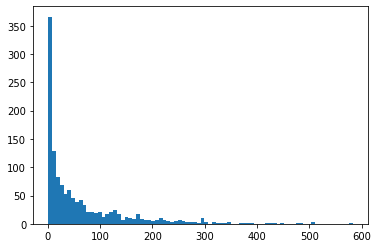

In [91]:
import matplotlib.pyplot as plt
plt.hist(ratings['Number of Ratings'],bins =80)
plt.show()

(array([ 56.,  23.,  76., 137., 182., 301., 256., 196.,  34.,   7.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

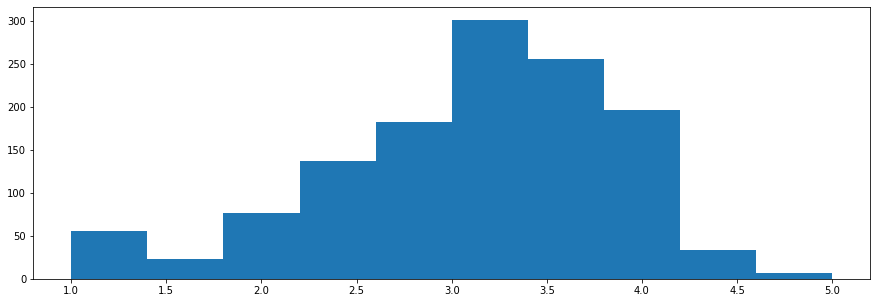

In [95]:
plt.figure(figsize = (15,5))
plt.hist(ratings['Rating'])

In [102]:
pivot_movie = df2.pivot_table(index = 'UserID',columns = 'Title',values = 'Rating')
pivot_movie.head()

Title,'Til There Was You (1997),1-900 (06) (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (One Eight Seven) (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),"39 Steps, The (1935)",8 1/2 (8½) (1963),...,"Women, The (1939)","Wonderful, Horrible Life of Leni Riefenstahl, The (Macht der Bilder: Leni Riefenstahl, Die) (1993)","World of Apu, The (Apur Sansar) (1959)",Wyatt Earp (1994),Year of the Horse (1997),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997)
UserID,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN


In [107]:
ratings.sort_values('Number of Ratings',ascending = False).head()

,Rating,Number of Ratings
Title,,
"Usual Suspects, The (1995)",4.358491,583
"Kid in King Arthur's Court, A (1995)",3.803536,509
City Hall (1996),4.155512,508
Mighty Morphin Power Rangers: The Movie (1995),4.007890,507
"Perez Family, The (1995)",3.156701,485


In [119]:
jedi_rating_angry = pivot_movie['12 Angry Men (1957)']
fagro_user_dimention = pivot_movie['101 Dalmatians (1996)']

In [120]:
jedi_rating_angry.head()

UserID
1   NaN
2   NaN
3   NaN
4   NaN
5   NaN
Name: 12 Angry Men (1957), dtype: float64

In [121]:
similer_to_return_of_angry = pivot_movie.corrwith(jedi_rating_angry)
similer_to_return_of_fagro = pivot_movie.corrwith(fagro_user_dimention)

In [153]:
similer_to_return_of_angry

Title
'Til There Was You (1997)                     NaN
1-900 (06) (1994)                             NaN
101 Dalmatians (1996)                         NaN
12 Angry Men (1957)                      1.000000
187 (One Eight Seven) (1997)                  NaN
                                           ...   
Young Frankenstein (1974)                     NaN
Young Guns (1988)                             NaN
Young Guns II (1990)                          NaN
Young Poisoner's Handbook, The (1995)   -0.589256
Zeus and Roxanne (1997)                       NaN
Length: 1268, dtype: float64

In [123]:
similer_to_return_of_angry , similer_to_return_of_fagro

(Title
 'Til There Was You (1997)                     NaN
 1-900 (06) (1994)                             NaN
 101 Dalmatians (1996)                         NaN
 12 Angry Men (1957)                      1.000000
 187 (One Eight Seven) (1997)                  NaN
                                            ...   
 Young Frankenstein (1974)                     NaN
 Young Guns (1988)                             NaN
 Young Guns II (1990)                          NaN
 Young Poisoner's Handbook, The (1995)   -0.589256
 Zeus and Roxanne (1997)                       NaN
 Length: 1268, dtype: float64, Title
 'Til There Was You (1997)                NaN
 1-900 (06) (1994)                        NaN
 101 Dalmatians (1996)                    1.0
 12 Angry Men (1957)                      NaN
 187 (One Eight Seven) (1997)             NaN
                                         ... 
 Young Frankenstein (1974)                NaN
 Young Guns (1988)                        NaN
 Young Guns II (1990)      

In [124]:
corr_with_jedi = pd.DataFrame(similer_to_return_of_jedi,columns =['Correlation'])

In [126]:
corr_with_jedi.dropna(inplace = True)

In [137]:
corr_with_jedi = corr_with_jedi.join(ratings['Number of Ratings'])

In [138]:
corr_with_jedi

,Correlation,Number of Ratings
Title,,
12 Angry Men (1957),1.000000,21
"39 Steps, The (1935)",0.848528,21
8 Seconds (1994),-0.250000,112
Above the Rim (1994),-1.000000,70
Addams Family Values (1993),-0.755929,162
...,...,...
"Wizard of Oz, The (1939)",0.755929,96
Wolf (1994),0.000000,111
"World of Apu, The (Apur Sansar) (1959)",-1.000000,36


In [140]:
corr_with_jedi = corr_with_jedi[corr_with_jedi['Number of Ratings']>200].sort_values('Correlation',ascending = False).head()

In [141]:
corr_with_jedi

,Correlation,Number of Ratings
Title,,
Philadelphia (1993),0.816497,215
Waiting to Exhale (1995),0.750993,209
"Hudsucker Proxy, The (1994)",0.710819,221
Thinner (1996),0.707107,267
Mixed Nuts (1994),0.691751,268


In [143]:
corr_fagro = pd.DataFrame(similer_to_return_of_fagro,columns = ['Correlation'])

In [146]:
corr_fagro.dropna(inplace = True)

In [147]:
corr_fagro = corr_fagro.join(ratings['Number of Ratings'])

In [149]:
corr_fagro.head()

,Correlation,Number of Ratings
Title,,
101 Dalmatians (1996),1.0,5
2001: A Space Odyssey (1968),-1.0,85
8 Seconds (1994),1.0,112
Addams Family Values (1993),1.0,162
"Arrival, The (1996)",1.0,316


In [152]:
corr_fagro[corr_fagro['Number of Ratings'] > 200].sort_values('Correlation',ascending = False).head()

,Correlation,Number of Ratings
Title,,
"Kid in King Arthur's Court, A (1995)",1.0,509
"Arrival, The (1996)",1.0,316
Cutthroat Island (1995),1.0,293
Mad Love (1995),1.0,221
"Young Poisoner's Handbook, The (1995)",1.0,378
